firstly we import the important files

In [ ]:
import pandas as pd
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


get data from google drive by using pandas library

In [ ]:
df=pd.read_excel("/content/drive/MyDrive/supply.xlsx")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Order Status,Product Card Id,Product Category Id,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders).1,shipping date (DatetimeOrders).2,Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,...,COMPLETE,1360,73,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0,2/3/2018,10:56:00 PM,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,...,PENDING,1360,73,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0,1/18/2018,12:27:00 PM,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,...,CLOSED,1360,73,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0,1/17/2018,12:06:00 PM,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,...,COMPLETE,1360,73,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0,1/16/2018,11:45:00 AM,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,...,PENDING_PAYMENT,1360,73,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0,1/15/2018,11:24:00 AM,Standard Class
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180514,CASH,4,4,40.000000,399.980011,Shipping on time,0,45,Fishing,Brooklyn,...,CLOSED,1004,45,http://images.acmesports.sports/Field+%26+Stre...,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,0,1/20/2016,3:40:00 AM,Standard Class
180515,DEBIT,3,2,-613.770019,395.980011,Late delivery,1,45,Fishing,Bakersfield,...,COMPLETE,1004,45,http://images.acmesports.sports/Field+%26+Stre...,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,0,1/19/2016,1:34:00 AM,Second Class
180516,TRANSFER,5,4,141.110001,391.980011,Late delivery,1,45,Fishing,Bristol,...,PENDING,1004,45,http://images.acmesports.sports/Field+%26+Stre...,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,0,1/20/2016,9:00:00 PM,Standard Class
180517,PAYMENT,3,4,186.229996,387.980011,Advance shipping,0,45,Fishing,Caguas,...,PENDING_PAYMENT,1004,45,http://images.acmesports.sports/Field+%26+Stre...,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,0,1/18/2016,8:18:00 PM,Standard Class


find null values from data

In [ ]:
pd.isnull(df).sum()

Type                                0
Days for shipping (real)            0
Days for shipment (scheduled)       0
Benefit per order                   0
Sales per customer                  0
Delivery Status                     0
Late_delivery_risk                  0
Category Id                         0
Category Name                       0
Customer City                       0
Customer Country                    0
Customer Email                      0
Customer Fname                      0
Customer Id                         0
Customer Lname                      8
Customer Segment                    0
Customer State                      0
Customer Street                     0
Customer Zipcode                    3
Department Id                       0
Department Name                     0
Latitude                            0
Longitude                           0
Market                              0
Order City                          0
Order Country                       0
Order Custom

delete null values from data

In [ ]:
df=df.dropna()

In [ ]:
df.isnull().sum()

Type                                0
Days for shipping (real)            0
Days for shipment (scheduled)       0
Benefit per order                   0
Sales per customer                  0
Delivery Status                     0
Late_delivery_risk                  0
Category Id                         0
Category Name                       0
Customer City                       0
Customer Country                    0
Customer Email                      0
Customer Fname                      0
Customer Id                         0
Customer Lname                      0
Customer Segment                    0
Customer State                      0
Customer Street                     0
Customer Zipcode                    0
Department Id                       0
Department Name                     0
Latitude                            0
Longitude                           0
Market                              0
Order City                          0
Order Country                       0
Order Custom

get the overall information of data

```
# This is formatted as code
```



In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 180508 entries, 0 to 180518
Data columns (total 52 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   Type                              180508 non-null  object 
 1   Days for shipping (real)          180508 non-null  int64  
 2   Days for shipment (scheduled)     180508 non-null  int64  
 3   Benefit per order                 180508 non-null  float64
 4   Sales per customer                180508 non-null  float64
 5   Delivery Status                   180508 non-null  object 
 6   Late_delivery_risk                180508 non-null  int64  
 7   Category Id                       180508 non-null  int64  
 8   Category Name                     180508 non-null  object 
 9   Customer City                     180508 non-null  object 
 10  Customer Country                  180508 non-null  object 
 11  Customer Email                    180508 non-null  object

get summary statistics

In [ ]:
df.describe()

,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Late_delivery_risk,Category Id,Customer Id,Customer Zipcode,Department Id,Latitude,...,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Product Card Id,Product Category Id,Product Price,Product Status
count,180508.000000,180508.000000,180508.000000,180508.000000,180508.000000,180508.000000,180508.000000,180508.000000,180508.000000,180508.000000,...,180508.000000,180508.000000,180508.000000,180508.000000,180508.000000,180508.000000,180508.000000,180508.000000,180508.000000,180508.0
mean,3.497673,2.931837,21.971563,183.101751,0.548297,31.849270,6690.778857,35920.246698,5.443454,29.719858,...,141.222139,0.120639,2.127706,203.765496,183.101751,21.971563,692.469414,31.849270,141.222139,0.0
std,1.623743,1.374457,104.433860,120.041578,0.497663,15.637996,4162.304984,37542.214613,1.629175,9.813737,...,139.726960,0.466806,1.453469,132.270788,120.041578,104.433860,336.417349,15.637996,139.726960,0.0
min,0.000000,0.000000,-4274.979980,7.490000,0.000000,2.000000,1.000000,603.000000,2.000000,-33.937553,...,9.990000,-2.750000,1.000000,9.990000,7.490000,-4274.979980,19.000000,2.000000,9.990000,0.0
25%,2.000000,2.000000,7.000000,104.379997,0.000000,18.000000,3258.000000,725.000000,4.000000,18.265432,...,50.000000,0.080000,1.000000,119.980003,104.379997,7.000000,403.000000,18.000000,50.000000,0.0
50%,3.000000,4.000000,31.520000,163.990005,1.000000,29.000000,6456.000000,19380.000000,5.000000,33.144863,...,59.990002,0.270000,1.000000,199.919998,163.990005,31.520000,627.000000,29.000000,59.990002,0.0
75%,5.000000,4.000000,64.800003,247.399994,1.000000,45.000000,9779.000000,78202.500000,7.000000,39.279617,...,199.990005,0.360000,3.000000,299.950012,247.399994,64.800003,1004.000000,45.000000,199.990005,0.0
max,6.000000,4.000000,911.799988,1939.989990,1.000000,76.000000,20757.000000,99205.000000,12.000000,48.781933,...,1999.989990,0.500000,5.000000,1999.989990,1939.989990,911.799988,1363.000000,76.000000,1999.989990,0.0


in customer table there is only 20641 values are unique that means the rest are duplicates

In [ ]:
df['Customer Id'].nunique()

20641

In [ ]:
df.columns

Index(['Type', 'Days for shipping (real)', 'Days for shipment (scheduled)',
       'Benefit per order', 'Sales per customer', 'Delivery Status',
       'Late_delivery_risk', 'Category Id', 'Category Name', 'Customer City',
       'Customer Country', 'Customer Email', 'Customer Fname', 'Customer Id',
       'Customer Lname', 'Customer Segment', 'Customer State',
       'Customer Street', 'Customer Zipcode', 'Department Id',
       'Department Name', 'Latitude', 'Longitude', 'Market', 'Order City',
       'Order Country', 'Order Customer Id', 'order date (DateOrders).1',
       'order date (DatetimeOrders).2', 'Order Id', 'Order Item Cardprod Id',
       'Order Item Discount', 'Order Item Discount Rate', 'Order Item Id',
       'Order Item Product Price', 'Order Item Profit Ratio',
       'Order Item Quantity', 'Sales', 'Order Item Total',
       'Order Profit Per Order', 'Order Region', 'Order State', 'Order Status',
       'Product Card Id', 'Product Category Id', 'Product Image',
    

made new variable for drop duplicates

In [ ]:
customers= df[['Customer City',
       'Customer Country', 'Customer Email', 'Customer Fname', 'Customer Id',
       'Customer Lname', 'Customer Segment', 'Customer State',
       'Customer Street', 'Customer Zipcode']]

In [ ]:
customers.drop_duplicates(inplace=True)

<ipython-input-14-05c6236a898c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customers.drop_duplicates(inplace=True)


In [ ]:
customers

,Customer City,Customer Country,Customer Email,Customer Fname,Customer Id,Customer Lname,Customer Segment,Customer State,Customer Street,Customer Zipcode
0,Caguas,Puerto Rico,XXXXXXXXX,Cally,20755,Holloway,Consumer,PR,5365 Noble Nectar Island,725.0
1,Caguas,Puerto Rico,XXXXXXXXX,Irene,19492,Luna,Consumer,PR,2679 Rustic Loop,725.0
2,San Jose,EE. UU.,XXXXXXXXX,Gillian,19491,Maldonado,Consumer,CA,8510 Round Bear Gate,95125.0
3,Los Angeles,EE. UU.,XXXXXXXXX,Tana,19490,Tate,Home Office,CA,3200 Amber Bend,90027.0
4,Caguas,Puerto Rico,XXXXXXXXX,Orli,19489,Hendricks,Corporate,PR,8671 Iron Anchor Corners,725.0
...,...,...,...,...,...,...,...,...,...,...
179260,Caguas,Puerto Rico,XXXXXXXXX,Diana,18586,Tran,Home Office,PR,1802 Broad Carrefour,725.0
179261,Caguas,Puerto Rico,XXXXXXXXX,Anika,16322,Davenport,Home Office,PR,8284 Colonial Gate Path,725.0
179262,Caguas,Puerto Rico,XXXXXXXXX,Yuri,18579,Smith,Home Office,PR,2248 Heather Mews,725.0
179263,Caguas,Puerto Rico,XXXXXXXXX,Hyacinth,16244,Witt,Home Office,PR,7247 Honey Prairie Field,725.0


Customer Analysis

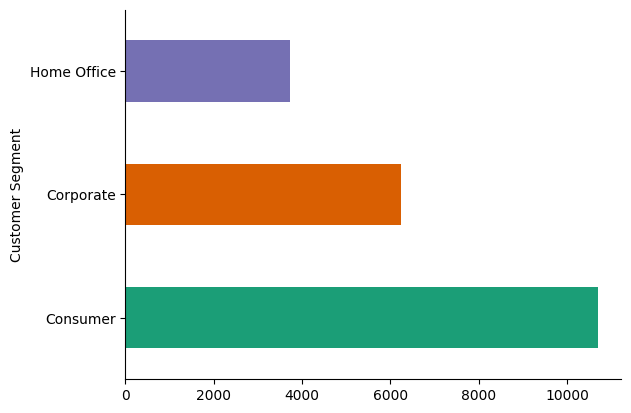

In [ ]:
#  Customer Segment

from matplotlib import pyplot as plt
import seaborn as sns
customers.groupby('Customer Segment').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
# Calculate sales by customer segment
sales_by_segment = df.groupby('Customer Segment')['Sales'].sum().reset_index()


In [ ]:
sales_by_segment

,Customer Segment,Sales
0,Consumer,1.909472e+07
1,Corporate,1.116687e+07
2,Home Office,6.519712e+06


<ipython-input-19-6f10ab383f0f>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Customer Segment', y='Sales', data=sales_by_segment, palette='viridis')


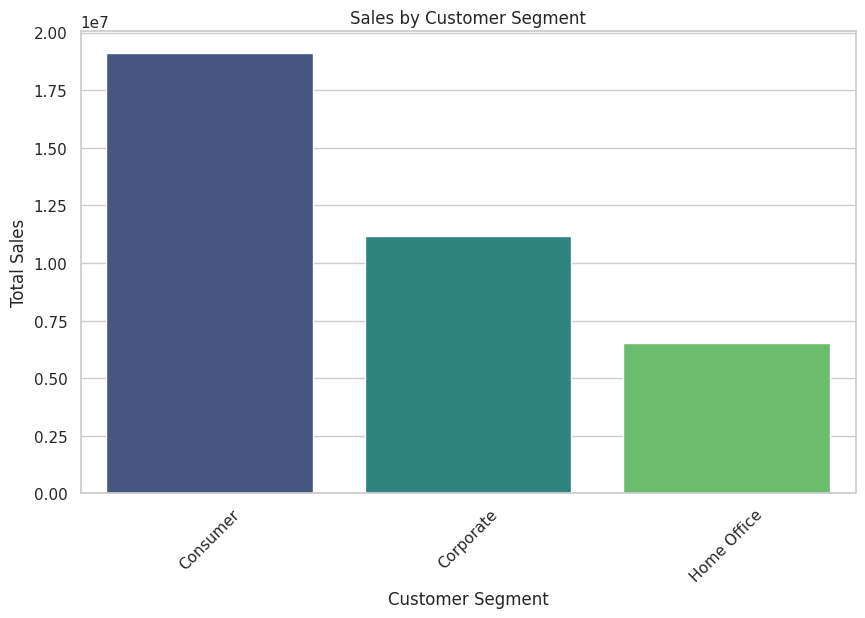

In [ ]:
# Set the style for the plot
sns.set(style="whitegrid")

# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Customer Segment', y='Sales', data=sales_by_segment, palette='viridis')

# Add titles and labels
plt.title('Sales by Customer Segment')
plt.xlabel('Customer Segment')
plt.ylabel('Total Sales')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.show()

In [ ]:
# Calculate sales by customer city
top_cities_by_sales = df.groupby('Customer City')['Sales'].sum().nlargest(10).reset_index()


In [ ]:
top_cities_by_sales

,Customer City,Sales
0,Caguas,1.360969e+07
1,Chicago,7.976142e+05
2,Los Angeles,6.974259e+05
3,Brooklyn,6.764198e+05
4,New York,3.612171e+05
5,Philadelphia,3.157055e+05
6,Bronx,3.089050e+05
7,San Diego,2.938305e+05
8,Miami,2.703682e+05
9,Houston,2.673479e+05


<ipython-input-22-db059e4c64fc>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Sales', y='Customer City', data=top_cities_by_sales, palette='viridis')


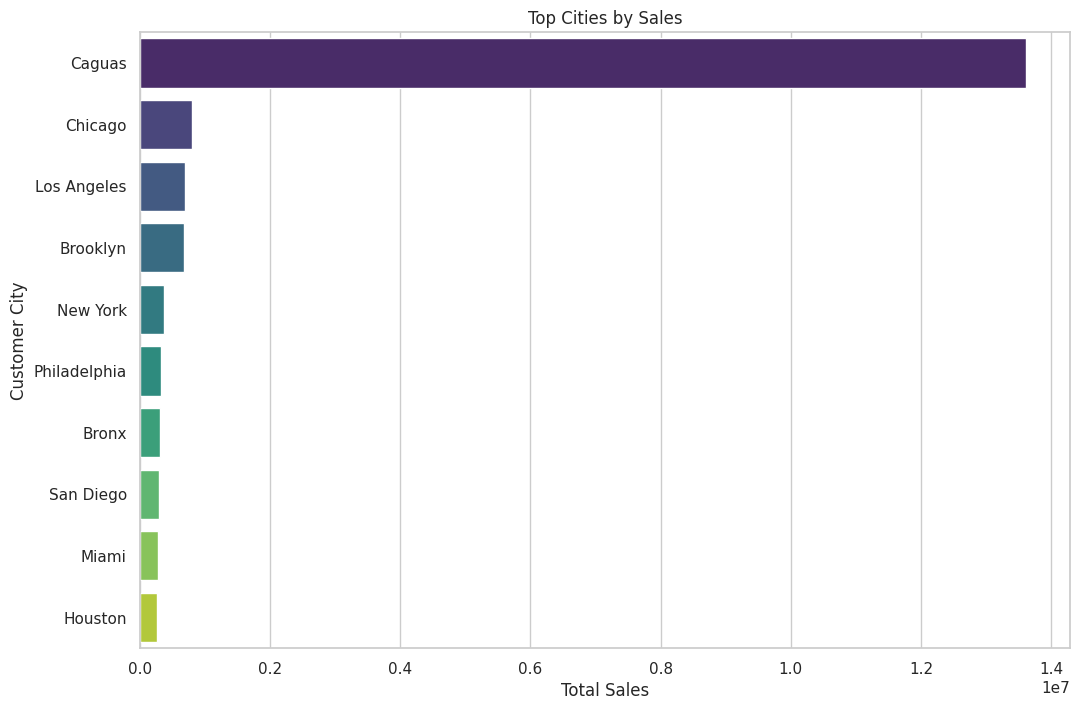

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for the plot
sns.set(style="whitegrid")

# Create the bar plot
plt.figure(figsize=(12, 8))
sns.barplot(x='Sales', y='Customer City', data=top_cities_by_sales, palette='viridis')

# Add titles and labels
plt.title('Top Cities by Sales')
plt.xlabel('Total Sales')
plt.ylabel('Customer City')

# Display the plot
plt.show()


Sales and Profit Analyses

In [ ]:
total_sales = df['Order Item Total'].sum()
total_profit = df['Order Profit Per Order'].sum()
total_profit


3966042.924042181

<ipython-input-41-bcef4ea34da3>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Metric', y='Value', data=summary_df, palette='viridis')


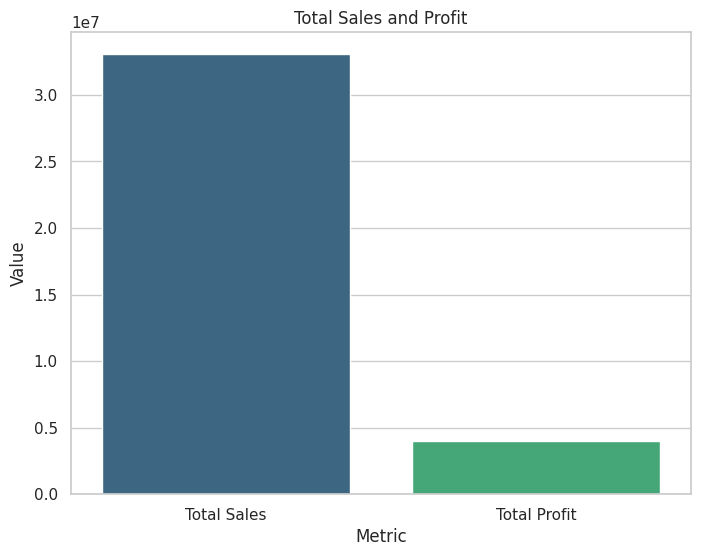

In [ ]:

# Calculate total sales and total profit
total_sales = df['Order Item Total'].sum()
total_profit = df['Order Profit Per Order'].sum()

# Create a DataFrame for plotting
summary_df = pd.DataFrame({
    'Metric': ['Total Sales', 'Total Profit'],
    'Value': [total_sales, total_profit]
})

# Set the style for the plot
sns.set(style="whitegrid")

# Create the bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x='Metric', y='Value', data=summary_df, palette='viridis')

# Add titles and labels
plt.title('Total Sales and Profit')
plt.xlabel('Metric')
plt.ylabel('Value')

# Display the plot
plt.show()

<ipython-input-23-50221ac7ef6c>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Customer Id', y='Average Sales', data=top_avg_sales_customers, palette='rainbow')


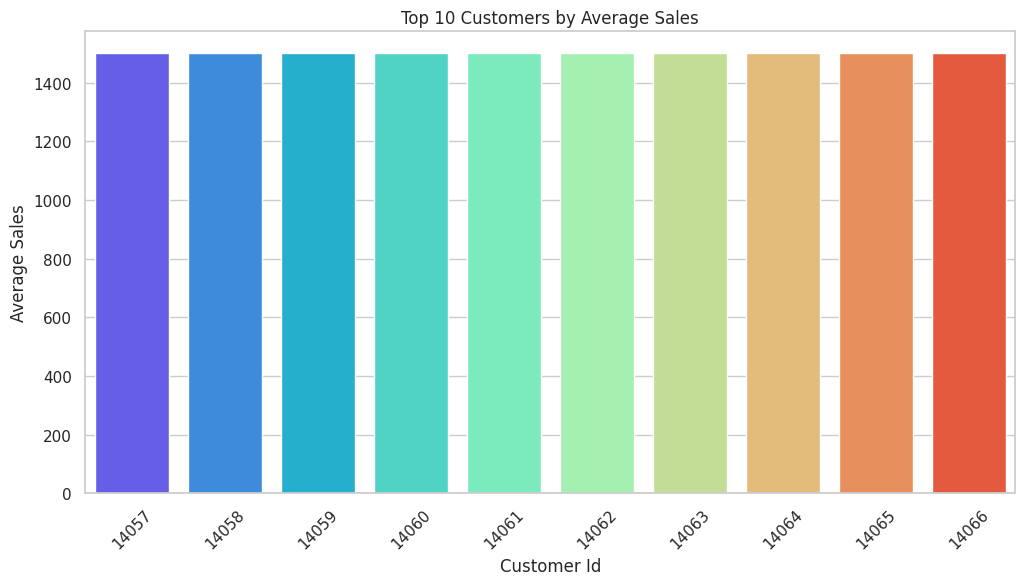

In [ ]:
# Calculate average sales per customer
avg_sales_per_customer = df.groupby('Customer Id')['Sales'].mean().reset_index()

# Rename the columns for clarity
avg_sales_per_customer.columns = ['Customer Id', 'Average Sales']

# Set the style for the plot
sns.set(style="whitegrid")

# Create the bar plot (for top 10 customers by average sales)
top_avg_sales_customers = avg_sales_per_customer.nlargest(10, 'Average Sales')

plt.figure(figsize=(12, 6))
sns.barplot(x='Customer Id', y='Average Sales', data=top_avg_sales_customers, palette='rainbow')

# Add titles and labels
plt.title('Top 10 Customers by Average Sales')
plt.xlabel('Customer Id')
plt.ylabel('Average Sales')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.show()

<ipython-input-24-5deec907ff8e>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Order Profit Per Order', y='Product Name', data=most_profitable_products, palette='viridis')


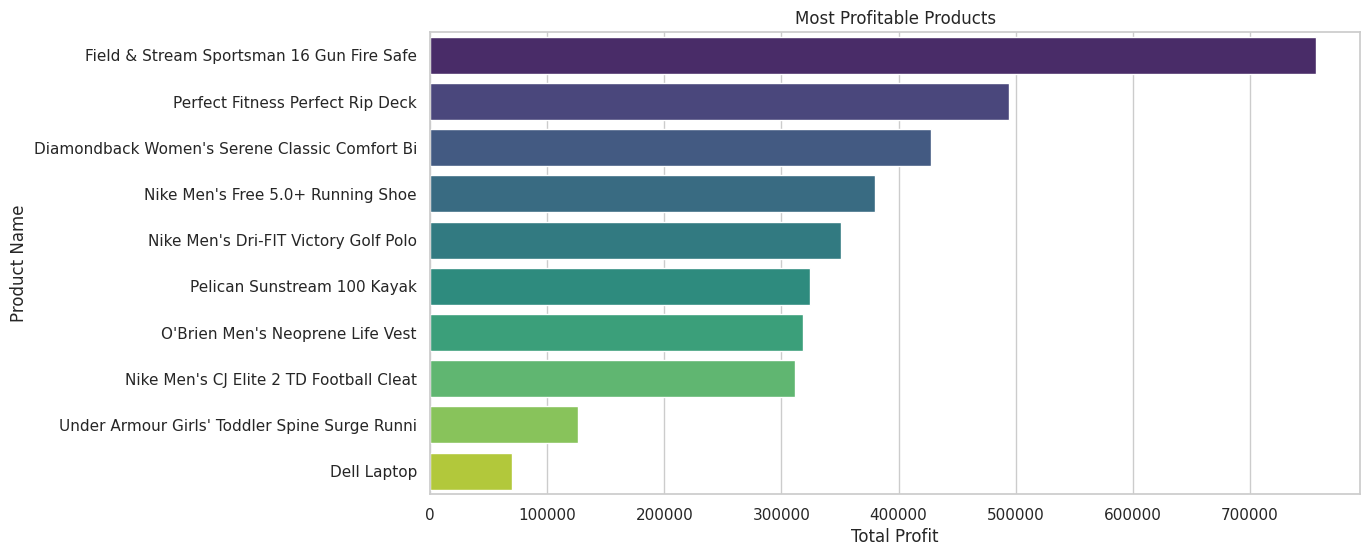

In [ ]:
# Calculate total profit by product
most_profitable_products = df.groupby('Product Name')['Order Profit Per Order'].sum().nlargest(10).reset_index()

# Set the style for the plot
sns.set(style="whitegrid")

# Create the bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='Order Profit Per Order', y='Product Name', data=most_profitable_products, palette='viridis')

# Add titles and labels
plt.title('Most Profitable Products')
plt.xlabel('Total Profit')
plt.ylabel('Product Name')

# Display the plot
plt.show()

Product analysis

In [ ]:
# Best-selling products
best_selling_products = df.groupby('Product Name')['Sales'].sum().sort_values(ascending=False).head(10)

In [ ]:
best_selling_products

Product Name
Field & Stream Sportsman 16 Gun Fire Safe        6.929654e+06
Perfect Fitness Perfect Rip Deck                 4.421143e+06
Diamondback Women's Serene Classic Comfort Bi    4.118426e+06
Nike Men's Free 5.0+ Running Shoe                3.667633e+06
Nike Men's Dri-FIT Victory Golf Polo             3.147800e+06
Pelican Sunstream 100 Kayak                      3.099845e+06
Nike Men's CJ Elite 2 TD Football Cleat          2.891758e+06
O'Brien Men's Neoprene Life Vest                 2.888994e+06
Under Armour Girls' Toddler Spine Surge Runni    1.269083e+06
Dell Laptop                                      6.630000e+05
Name: Sales, dtype: float64

<ipython-input-27-c7d6c3ed54b3>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Sales', y='Product Name', data=best_selling_products, palette='viridis')


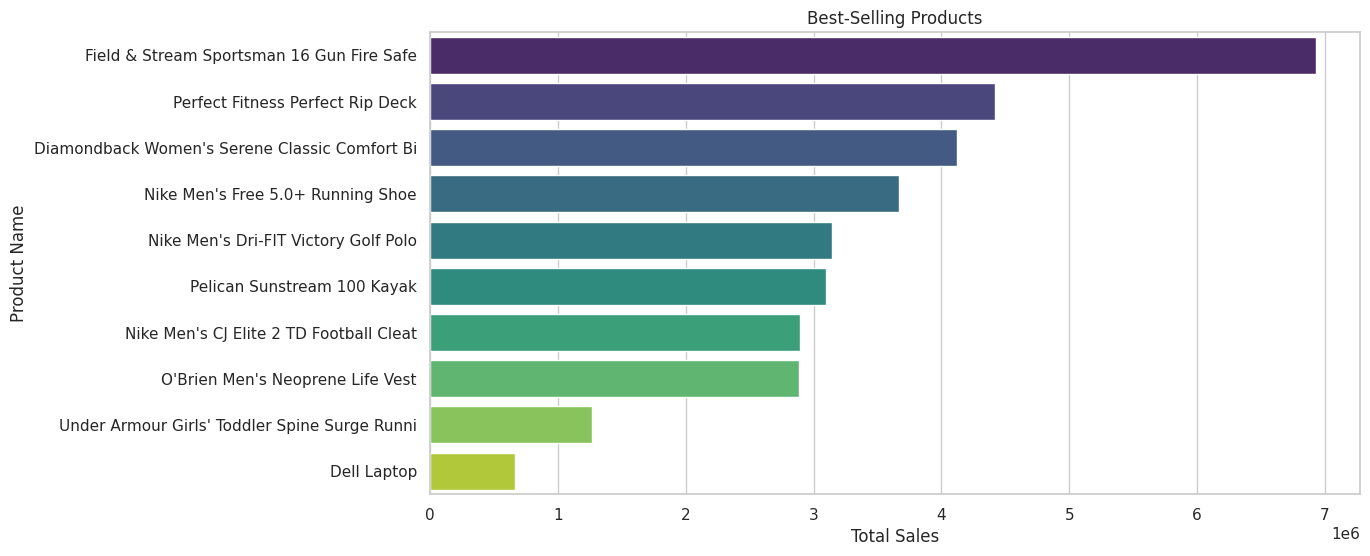

In [ ]:

# Calculate total sales by product
best_selling_products = df.groupby('Product Name')['Sales'].sum().nlargest(10).reset_index()

# Set the style for the plot
sns.set(style="whitegrid")

# Create the bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='Sales', y='Product Name', data=best_selling_products, palette='viridis')

# Add titles and labels
plt.title('Best-Selling Products')
plt.xlabel('Total Sales')
plt.ylabel('Product Name')

# Display the plot
plt.show()

In [ ]:
inventory_turnover = df.groupby('Product Name')['Order Item Quantity'].sum() / df.groupby('Product Name')['Order Item Quantity'].count()

In [ ]:
inventory_turnover

Product Name
Adult dog supplies                               1.000000
Baby sweater                                     1.000000
Bag Boy Beverage Holder                          3.028674
Bag Boy M330 Push Cart                           3.014493
Bowflex SelectTech 1090 Dumbbells                1.000000
                                                   ...   
adidas Kids' F5 Messi FG Soccer Cleat            2.980916
adidas Men's F10 Messi TRX FG Soccer Cleat       3.078689
adidas Men's Germany Black Crest Away Tee        2.972318
adidas Youth Germany Black/Red Away Match Soc    3.085987
insta-bed Neverflat Air Mattress                 1.000000
Name: Order Item Quantity, Length: 118, dtype: float64

Geographical Analysis

In [ ]:
sales_by_country = df.groupby('Customer Country')['Sales'].sum()

In [ ]:
sales_by_country

Customer Country
EE. UU.        2.263163e+07
Puerto Rico    1.414967e+07
Name: Sales, dtype: float64

In [ ]:
top_5_countries = sales_by_country.nlargest(5)  #get the top 5 country



In [ ]:
top_5_countries

Customer Country
EE. UU.        2.263163e+07
Puerto Rico    1.414967e+07
Name: Sales, dtype: float64

<ipython-input-34-ec45e167937f>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_5_countries.index, y=top_5_countries.values, palette='viridis')


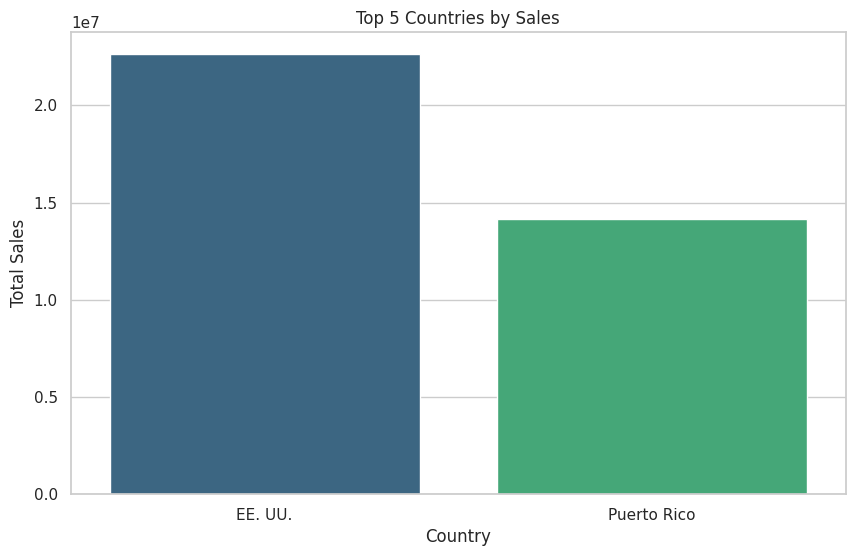

In [ ]:
sns.set(style="whitegrid")

# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=top_5_countries.index, y=top_5_countries.values, palette='viridis')

# Add titles and labels
plt.title('Top 5 Countries by Sales')
plt.xlabel('Country')
plt.ylabel('Total Sales')

# Display the plot
plt.show()

Discount and Profitability Analyses

In [ ]:
# Impact of discounts on sales
discount_impact = df.groupby('Order Item Discount Rate')['Sales'].sum()
discount_impact

Order Item Discount Rate
0.00    2.042369e+06
0.01    2.042793e+06
0.02    2.042778e+06
0.03    2.043344e+06
0.04    2.043125e+06
0.05    2.043413e+06
0.06    2.042603e+06
0.07    2.043236e+06
0.09    2.043017e+06
0.10    2.042823e+06
0.12    2.043578e+06
0.13    2.044095e+06
0.15    2.044115e+06
0.16    2.043772e+06
0.17    2.043783e+06
0.18    2.044147e+06
0.20    2.044242e+06
0.25    2.044069e+06
Name: Sales, dtype: float64

In [ ]:
# Correlation between discount and profit
discount_profit_correlation = df[['Order Item Discount Rate', 'Order Profit Per Order']].corr()

discount_profit_correlation

,Order Item Discount Rate,Order Profit Per Order
Order Item Discount Rate,1.000000,-0.018634
Order Profit Per Order,-0.018634,1.000000


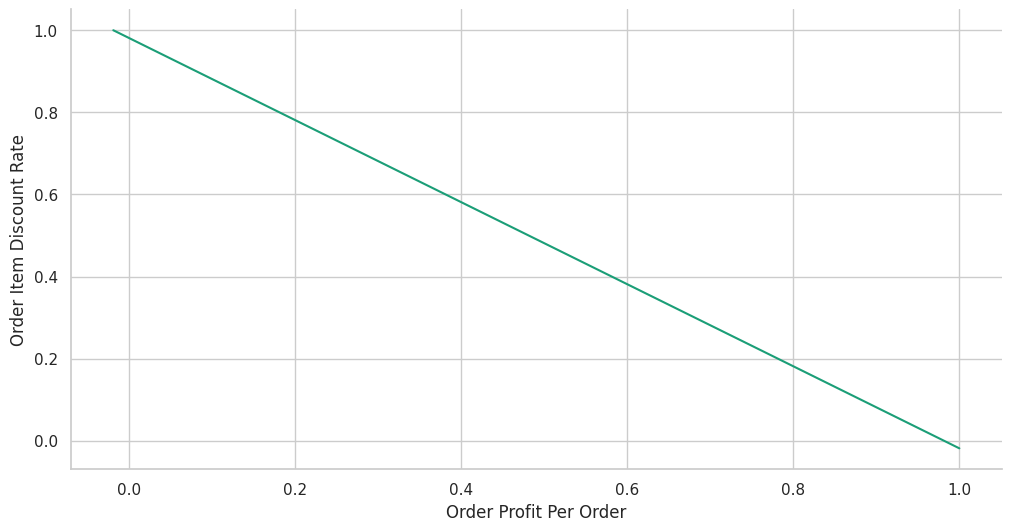

In [ ]:
# @title Order Profit Per Order vs Order Item Discount Rate

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Order Profit Per Order']
  ys = series['Order Item Discount Rate']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = discount_profit_correlation.sort_values('Order Profit Per Order', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Order Profit Per Order')
_ = plt.ylabel('Order Item Discount Rate')

In [ ]:
# Delivery success rate
delivery_success_rate = df['Delivery Status'].value_counts(normalize=True)
delivery_success_rate

Delivery Status
Late delivery        0.548297
Advance shipping     0.230400
Shipping on time     0.178347
Shipping canceled    0.042957
Name: proportion, dtype: float64